In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.15,
    rotation_range=15,
    width_shift_range=0.20,
    height_shift_range=0.10,
)
batch_sizee = 32
img_width = 64
img_height = 64


In [3]:
train_data = datagen.flow_from_directory(
    'A:\Kuliah\Skrpsi\Program\Image\Train',
    target_size=(img_height, img_width),
    batch_size=batch_sizee,
    class_mode='binary',
    color_mode='grayscale',
    subset='training'
    )
validasi_data = datagen.flow_from_directory(
    'A:\Kuliah\Skrpsi\Program\Image\Train',
    target_size=(img_height, img_width),    
    batch_size=batch_sizee,
    class_mode='binary',
    subset='validation',
    color_mode='grayscale'
)

Found 14214 images belonging to 2 classes.
Found 2507 images belonging to 2 classes.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, GlobalMaxPooling2D, Dropout, Dense, BatchNormalization, AveragePooling2D, Flatten
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping


# Model CNN
model = Sequential([
    Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(img_height, img_width, 1)),
    BatchNormalization(),
    Conv2D(16, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    AveragePooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    AveragePooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='tanh')  # Ubah ke softmax jika 2 kelas
])


optimizer = Adam(learning_rate=0.01)
loss_function = 'binary_crossentropy' 
model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])


model.summary()


c:\Program Files\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 32, 32, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 16, 16, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,065,585 (4.06 MB)

 Trainable params: 1,065,393 (4.06 MB)

 Non-trainable params: 192 (768.00 B)

In [5]:
history = model.fit(
    train_data,
    validation_data=validasi_data,
    epochs=10
)


Epoch 1/10


c:\Program Files\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


445/445 ━━━━━━━━━━━━━━━━━━━━ 88s 192ms/step - accuracy: 0.5670 - loss: 6.8594 - val_accuracy: 0.5596 - val_loss: 7.0977
Epoch 2/10
445/445 ━━━━━━━━━━━━━━━━━━━━ 86s 190ms/step - accuracy: 0.5595 - loss: 7.1006 - val_accuracy: 0.5596 - val_loss: 7.0979
Epoch 3/10
445/445 ━━━━━━━━━━━━━━━━━━━━ 85s 189ms/step - accuracy: 0.5689 - loss: 6.9484 - val_accuracy: 0.5596 - val_loss: 7.0979
Epoch 4/10
445/445 ━━━━━━━━━━━━━━━━━━━━ 79s 175ms/step - accuracy: 0.5613 - loss: 7.0709 - val_accuracy: 0.5592 - val_loss: 7.1043
Epoch 5/10
445/445 ━━━━━━━━━━━━━━━━━━━━ 78s 172ms/step - accuracy: 0.5628 - loss: 7.0474 - val_accuracy: 0.5596 - val_loss: 7.0979
Epoch 6/10
445/445 ━━━━━━━━━━━━━━━━━━━━ 77s 171ms/step - accuracy: 0.5556 - loss: 7.1622 - val_accuracy: 0.5592 - val_loss: 7.1043
Epoch 7/10
445/445 ━━━━━━━━━━━━━━━━━━━━ 151s 339ms/step - accuracy: 0.5595 - loss: 7.1003 - val_accuracy: 0.5592 - val_loss: 7.1043
Epoch 8/10
445/445 ━━━━━━━━━━━━━━━━━━━━ 110s 242ms/step - accuracy: 0.5653 - loss: 7.0071 - v

In [6]:
model.save(r"A:\Kuliah\Skrpsi\Program\model_cnn11.h5")



In [7]:
import tensorflow as tf

#model = tf.keras.models.load_model("model_FIX.h5")


In [8]:
import cv2
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return None  # Skip jika bukan gambar
    
    img = cv2.resize(img, (64, 64), interpolation=cv2.INTER_LINEAR)
    img = img / 255.0  # Normalisasi
    img = np.expand_dims(img, axis=-1)  # Tambah channel untuk grayscale (64, 64, 1)
    img = np.expand_dims(img, axis=0)  # Tambah batch dimension (1, 64, 64, 1)
    return img


# === 3. Load Semua Gambar Validasi Secara Manual ===
class_names = validasi_data.class_indices  # Ambil label otomatis dari data generator
class_names = {v: k for k, v in class_names.items()}  # Balikkan indeks ke nama kelas

y_true = []
y_pred = []

for image_path, label in zip(validasi_data.filepaths, validasi_data.labels):
    image = preprocess_image(image_path)  # Preprocess gambar
    if image is None:
        print(f"Gagal membaca gambar: {image_path}, dilewati.")
        continue
    
    prediction = model.predict(image, verbose=0)  # Prediksi model
    predicted_class = 1 if prediction[0][0] > 0.5 else 0  # Threshold 0.5 untuk sigmoid
    
    y_true.append(label)  # Label asli (0 atau 1)
    y_pred.append(predicted_class)  # Label prediksi (0 atau 1)

# === 4. Hitung Confusion Matrix ===
cm = confusion_matrix(np.array(y_true), np.array(y_pred))
print("Confusion Matrix:\n", cm)
accuracy = accuracy_score(np.array(y_true), np.array(y_pred))


Confusion Matrix:
 [[1402    0]
 [1105    0]]


In [9]:
from sklearn.metrics import f1_score


# Menghitung F1 Score
f1 = f1_score(y_true, y_pred)

print("F1", f1) 


F1 0.0


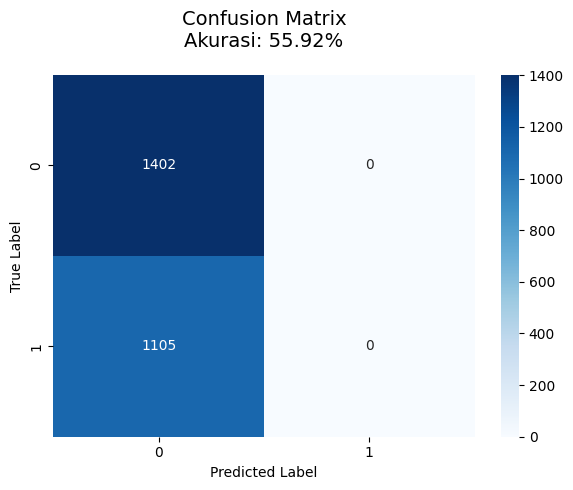

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", 
                 xticklabels=class_names.keys(), 
                 yticklabels=class_names.keys())

plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Judul dengan akurasi digabung
plt.title(f"Confusion Matrix\nAkurasi: {accuracy:.2%}", fontsize=14, pad=20)

plt.tight_layout()
plt.show()


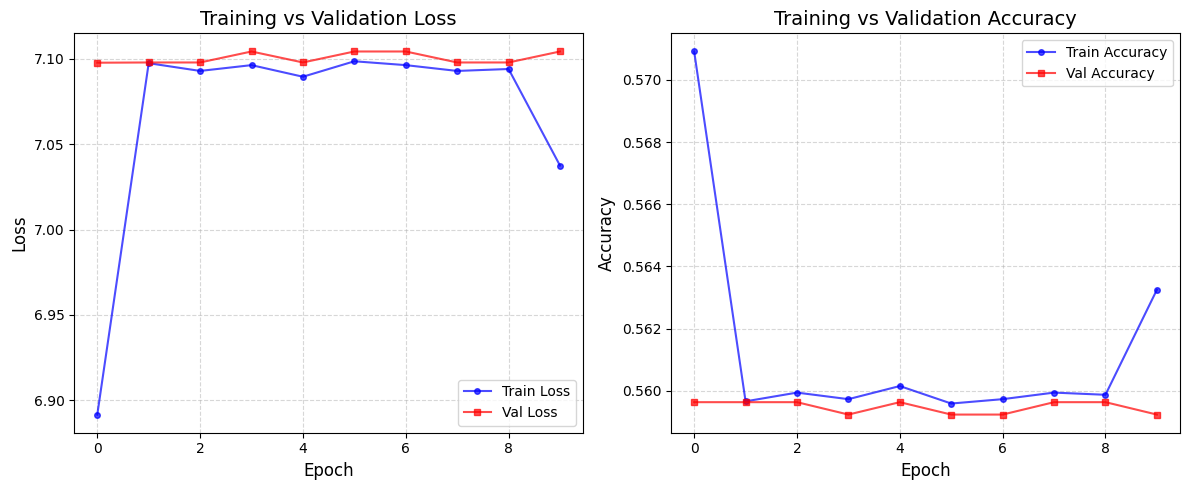

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))  # Lebar 12 inci, tinggi 5 inci

# === Subplot 1: Loss ===
plt.subplot(1, 2, 1)  # 1 baris, 2 kolom, subplot ke-1
plt.plot(history.history['loss'], label='Train Loss', color='blue', marker='o', markersize=4, linewidth=1.5, alpha=0.7)
plt.plot(history.history['val_loss'], label='Val Loss', color='red', marker='s', markersize=4, linewidth=1.5, alpha=0.7)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training vs Validation Loss', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

# === Subplot 2: Accuracy ===
plt.subplot(1, 2, 2)  # 1 baris, 2 kolom, subplot ke-2
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue', marker='o', markersize=4, linewidth=1.5, alpha=0.7)
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='red', marker='s', markersize=4, linewidth=1.5, alpha=0.7)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Training vs Validation Accuracy', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()  # Mencegah tumpang tindih
plt.show()

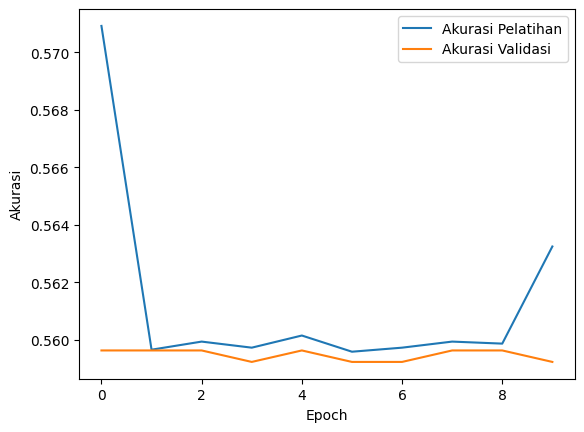

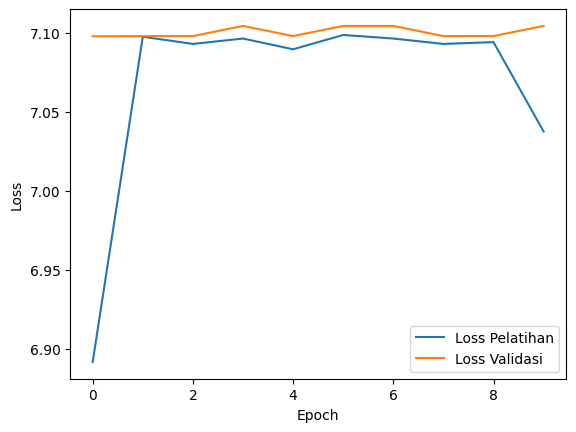

In [12]:
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
aa

NameError: name 'aa' is not defined

In [ ]:
import cv2
import os

# Path folder gambar
folder_path = "A:/Kuliah/Lomba/Lomba Big Data/Test Data"

# Ambil daftar file dalam folder
file_list = os.listdir(folder_path)

# Loop untuk membaca setiap gambar
for file_name in file_list:
    if file_name.endswith(('.jpg', '.png', '.jpeg')):  # Filter hanya gambar
        img_path = os.path.join(folder_path, file_name)  # Gabungkan path
        image = cv2.imread(img_path)  # Membaca gambar
        
        if image is not None:
            print(f"Berhasil membaca: {file_name}, ukuran: {image.shape}")
        else:
            print(f"Gagal membaca: {file_name}")


In [ ]:
import cv2
import os
import pandas as pd

# Path folder gambar
folder_path = r"A:\Kuliah\Skrpsi\Program\Image\Test"

# Ambil daftar file dalam folder
file_list = os.listdir(folder_path)

# List untuk menyimpan informasi gambar
data = []

# Loop untuk membaca setiap gambar
for file_name in file_list:
    if file_name.endswith(('.jpg', '.png', '.jpeg')):  # Filter hanya gambar
        img_path = os.path.join(folder_path, file_name)  # Gabungkan path
        image = cv2.imread(img_path)  # Membaca gambar
        
        if image is not None: # Dapatkan ukuran gambar
            data.append([file_name,img_path])  # Simpan ke list

# Buat DataFrame pandas
df = pd.DataFrame(data, columns=["Nama File","path"])

# Simpan ke file Excel
excel_path = r"A:\Kuliah\Skrpsi\Program\hasil_pembacaan_gambar.xlsx"
df.to_excel(excel_path, index=False)

print(f"Data berhasil disimpan ke {excel_path}")


Data berhasil disimpan ke A:\Kuliah\Skrpsi\Program\hasil_pembacaan_gambar.xlsx


In [ ]:
import pandas as pd 

In [ ]:
data=pd.read_excel("A:\Kuliah\Skrpsi\Program\hasil_pembacaan_gambar(gaboleh diubah).xlsx")
data_shuffled = data.sample(frac=1).reset_index(drop=True)

# Simpan kembali hasil yang sudah diacak ke Excel
data_shuffled.to_excel(r"A:\Kuliah\Skrpsi\Program\hasil_pembacaan_gambar_acak.xlsx", index=False)

print("Data berhasil diacak dan disimpan!")

Data berhasil diacak dan disimpan!


In [ ]:
read= pd.read_excel("A:\Kuliah\Skrpsi\Program\hasil_pembacaan_gambar_acak.xlsx")

In [ ]:
read

,Nama File,path,Actual,Predic
0,04482_face_1.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\04482_face...,Human,NaN
1,02862_face_1.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\02862_face...,Human,NaN
2,person_2019.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\person_201...,AI FIX,NaN
3,person_1915.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\person_191...,AI FIX,NaN
4,02824_face_1.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\02824_face...,Human,NaN
...,...,...,...,...
877,person_1957.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\person_195...,AI FIX,NaN
878,00664_face_6.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\00664_face...,Human,NaN
879,person_1666.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\person_166...,AI FIX,NaN
880,02604_face_1.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\02604_face...,Human,NaN


In [ ]:
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Baca dalam grayscale
    if img is None:
        return None  # Jika gambar tidak valid, return None
    
    img = cv2.resize(img, (32, 32), interpolation=cv2.INTER_LINEAR)  # Resize
    img = img / 255.0  # Normalisasi
    img = np.expand_dims(img, axis=-1)  # Tambah channel untuk grayscale (64, 64, 1)
    img = np.expand_dims(img, axis=0)  # Tambah batch dimension (1, 64, 64, 1)
    return img

# === 3. Membaca Data Excel ===
excel_path = r"A:\Kuliah\Skrpsi\Program\hasil_pembacaan_gambar_acak.xlsx"
df = pd.read_excel(excel_path)

# **Periksa Nama Kolom**
print("Kolom dalam DataFrame:", df.columns)  

# Pastikan nama kolom benar ("path" bukan "Path")
if "path" in df.columns:
    path_col = "path"
elif "Path" in df.columns:
    path_col = "Path"
else:
    raise ValueError("Kolom path tidak ditemukan dalam Excel!")

# === 4. Melakukan Prediksi pada Setiap Gambar ===
class_labels = {0: "AI FIX", 1: "Human"}  # Pastikan sesuai dengan model

predictions = []  # List untuk menyimpan hasil prediksi

for index, row in df.iterrows():
    image_path = row[path_col]  # Ambil path gambar
    
    image = preprocess_image(image_path)  # Preprocess gambar
    if image is None:
        print(f"Gagal membaca gambar: {image_path}, dilewati.")
        predictions.append("Error")  # Tandai sebagai error
        continue
    
    prediction = model.predict(image)  # Prediksi model
    predicted_class = np.argmax(prediction, axis=1)[0]  # Ambil label prediksi
    predicted_label = class_labels[predicted_class]  # Ubah ke nama class
    
    predictions.append(predicted_label)  # Simpan hasil prediksi

# === 5. Menyimpan Hasil ke Excel ===
df["Predic"] = predictions  # Tambahkan kolom prediksi
output_path = r"A:\Kuliah\Skrpsi\Program\hasil_pembacaan_gambar_acak.xlsx"
df.to_excel(output_path, index=False)

print(f"Hasil prediksi telah disimpan ke {output_path}")

Kolom dalam DataFrame: Index(['Nama File', 'path', 'Actual', 'Predic'], dtype='object')
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


KeyboardInterrupt: 

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Baca file Excel yang sudah ada prediksinya
excel_path = r"A:\Kuliah\Skrpsi\Program\hasil_pembacaan_gambar_acak.xlsx"
df = pd.read_excel(excel_path)


In [ ]:
df

,Nama File,path,Actual,Predic
0,02516_face_1.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\02516_face...,Human,Human
1,person_1801.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\person_180...,AI FIX,AI FIX
2,person_1772.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\person_177...,AI FIX,AI FIX
3,person_1825.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\person_182...,AI FIX,AI FIX
4,02768_face_1.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\02768_face...,Human,AI FIX
...,...,...,...,...
877,02577_face_2.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\02577_face...,Human,Human
878,person_1882.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\person_188...,AI FIX,AI FIX
879,person_1872.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\person_187...,AI FIX,AI FIX
880,person_1756.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\person_175...,AI FIX,AI FIX


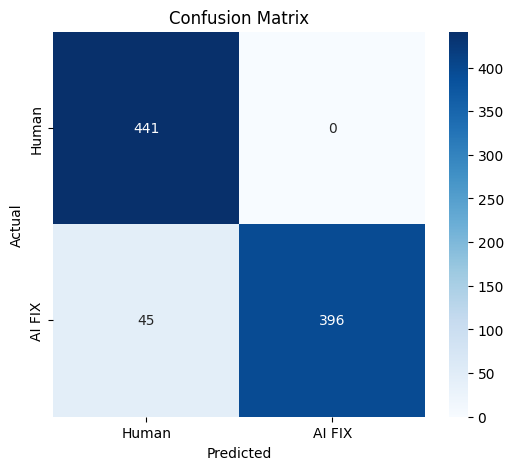

In [ ]:
actual = df["Actual"]
predicted = df["Predic"]

# Buat confusion matrix
cm = confusion_matrix(actual, predicted, labels=["AI FIX", "Human"])

# Buat heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Human", "AI FIX"], yticklabels=["Human", "AI FIX"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

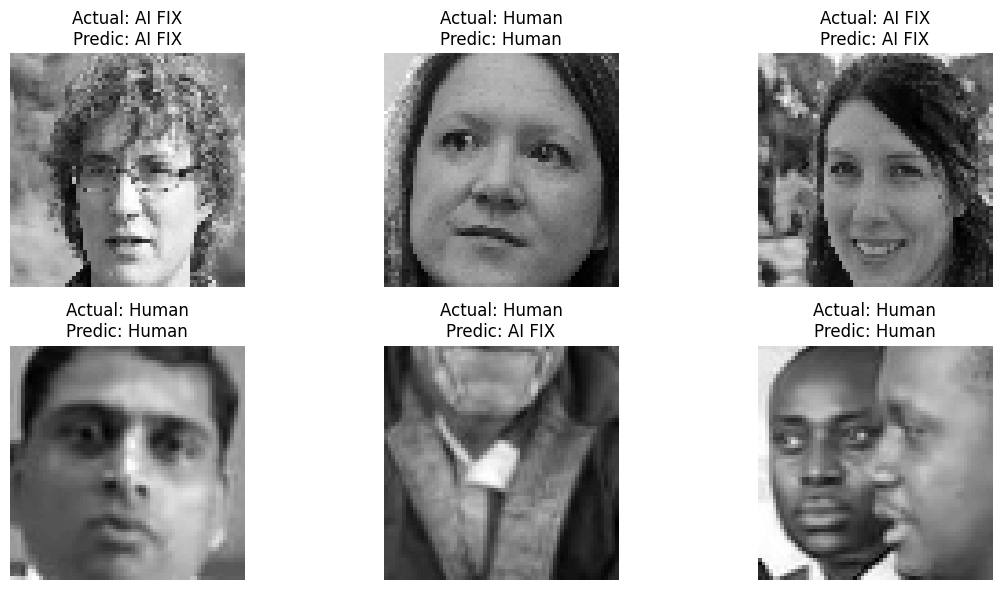

In [ ]:

# Acak data dan ambil 6 gambar pertama yang tidak error
df_filtered = df[df["Predic"] != "Error"].sample(frac=1).head(6)

# Buat plot gambar
plt.figure(figsize=(12, 6))

for i, row in enumerate(df_filtered.itertuples()):
    image_path = row.path  # Sesuaikan dengan nama kolom di Excel
    actual_label = row.Actual  # Label sebenarnya
    predicted_label = row.Predic  # Prediksi dari model

    # Baca dan proses gambar
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        img = cv2.resize(img, (64, 64))  # Resize agar sesuai
    else:
        continue  # Jika gambar tidak valid, skip

    # Plot gambar
    plt.subplot(2, 3, i + 1)  # Grid 2x3
    plt.imshow(img, cmap="gray")
    plt.title(f"Actual: {actual_label}\nPredic: {predicted_label}")
    plt.axis("off")

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
                                       Path Gambar  Prediksi  Akurasi
0  A:\Kuliah\Skrpsi\Program\Test\download (10).jpg         0    23.50
1  A:\Kuliah\Skrpsi\Program\Test\download (11).jpg         1    83.19
2  A:\Kuliah\Skrpsi\Program\Test\download (15).jpg         1    99.97
3  A:\Kuliah\Skrpsi\Program\Test\download (17).jpg         1    76.15
4  A:\Kuliah\Skrpsi\Program\Test\download (18).jpg         1   100.00
5   A:\Kuliah\Skrpsi\Program\Test\download (6).jpg         0     0.00
6   A:\Kuliah\Skrpsi\Program\Test\download (7).jpg         0     0.00
7   A:\Kuliah\Skrpsi\Program\Test\download (8).jpg         

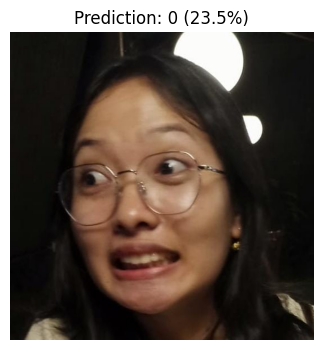

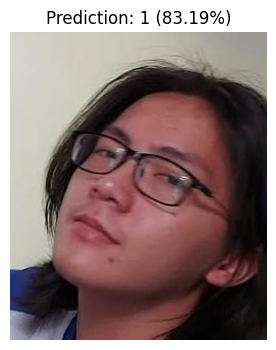

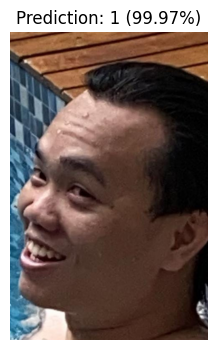

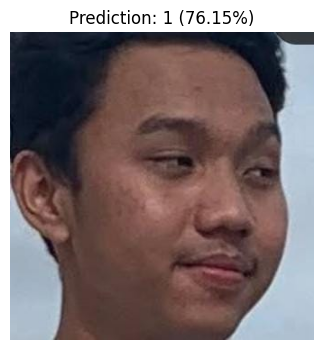

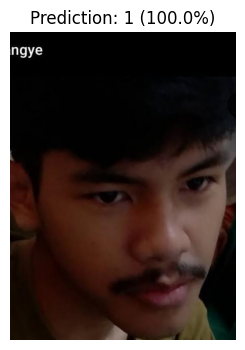

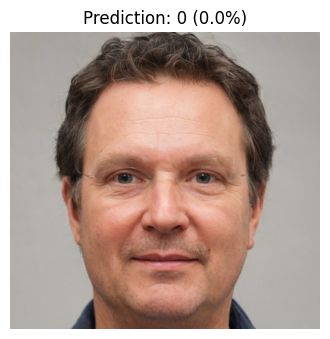

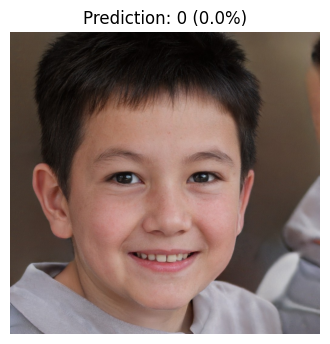

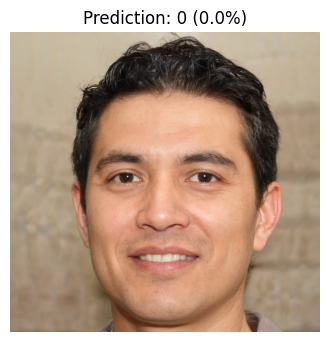

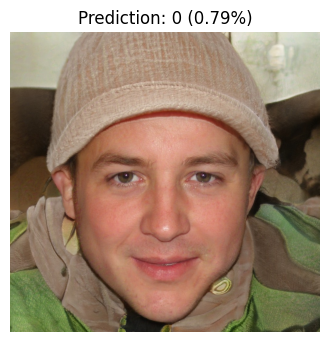

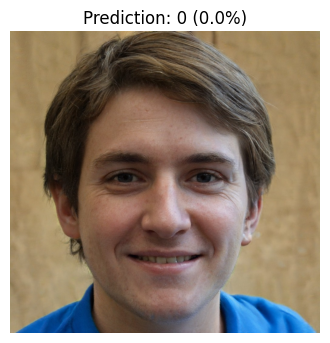

In [ ]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Path folder gambar
folder_path = r"A:\Kuliah\Skrpsi\Program\Test"

# Ambil daftar file gambar
file_list = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Simpan hasil prediksi
predictions = []

# Threshold untuk klasifikasi biner
threshold = 0.5  # Ubah sesuai kebutuhan

for file_name in file_list:
    img_path = os.path.join(folder_path, file_name)
    
    # Baca gambar dalam grayscale untuk preprocessing
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if image is not None:
        # Preprocessing untuk prediksi
        image_resized = cv2.resize(image, (64, 64))  # Resize ke ukuran input model
        image_resized = image_resized / 255.0  # Normalisasi
        image_resized = np.expand_dims(image_resized, axis=-1)  # Tambahkan channel grayscale
        image_resized = np.expand_dims(image_resized, axis=0)  # Tambahkan batch dimensi

        # Lakukan prediksi
        pred = model.predict(image_resized)[0][0]  # Ambil hasil sigmoid (nilai antara 0 dan 1)
        
        # Tentukan kelas berdasarkan threshold
        predicted_label = 1 if pred > threshold else 0
        confidence_score = round(pred * 100, 2)  # Ubah ke persen (%)

        # Simpan hasil prediksi
        predictions.append({
            "Path Gambar": img_path,
            "Prediksi": predicted_label,
            "Akurasi": confidence_score
        })

    else:
        print(f"Gagal membaca: {file_name}")

# Konversi hasil prediksi ke DataFrame
df = pd.DataFrame(predictions)

# Simpan ke CSV jika diperlukan
df.to_csv("Data_Test_wajah_asli_teman-teman.csv", index=False)

# **Tampilkan hasil dalam bentuk tabel**
print(df)

# **Tampilkan gambar satu per satu**
for row in df.itertuples():
    image_path = row._1  # Path Gambar
    predicted_label = row.Prediksi
    confidence_score = row.Akurasi

    # Baca gambar asli dalam warna (RGB) tanpa preprocessing
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Konversi BGR ke RGB agar warnanya benar

    if img is not None:
        plt.figure(figsize=(4, 4))  # Atur ukuran gambar
        plt.imshow(img)
        plt.title(f"Prediction: {predicted_label} ({confidence_score}%)")
        plt.axis("off")
        plt.show()  # Tampilkan satu gambar lalu tunggu sebelum lanjut
